# Heart Disease Prediction Model
---

In [82]:
import pandas as pd

d1 = pd.read_csv("Main.csv")
d1.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [83]:
d1.info()
d1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [84]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")

#print(d1.isnull().sum())
d1 = d1
d1['Age'] = si.fit_transform(d1[['Age']])
d1['Blood Pressure'] = si.fit_transform(d1[['Blood Pressure']])
# Fix column name below if needed
d1['Cholesterol Level'] = si.fit_transform(d1[['Cholesterol Level']])
d1['BMI'] = si.fit_transform(d1[['BMI']])
d1['Sleep Hours'] = si.fit_transform(d1[['Sleep Hours']])
d1['Triglyceride Level'] = si.fit_transform(d1[['Triglyceride Level']])
d1['Fasting Blood Sugar'] = si.fit_transform(d1[['Fasting Blood Sugar']])
d1['CRP Level'] = si.fit_transform(d1[['CRP Level']])
d1['Homocysteine Level'] = si.fit_transform(d1[['Homocysteine Level']])

print(d1.isnull().sum())

Age                        0
Gender                    19
Blood Pressure             0
Cholesterol Level          0
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                        0
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours                0
Sugar Consumption         30
Triglyceride Level         0
Fasting Blood Sugar        0
CRP Level                  0
Homocysteine Level         0
Heart Disease Status       0
dtype: int64


In [85]:
si_c = SimpleImputer(strategy="most_frequent")
d1 = d1.copy()
d1['Gender'] = si_c.fit_transform(d1[['Gender']]).ravel()
d1['Exercise Habits'] = si_c.fit_transform(d1[['Exercise Habits']]).ravel()
d1['Smoking'] = si_c.fit_transform(d1[['Smoking']]).ravel()
d1['Family Heart Disease'] = si_c.fit_transform(d1[['Family Heart Disease']]).ravel()
d1['Diabetes'] = si_c.fit_transform(d1[['Diabetes']]).ravel()
d1['High Blood Pressure'] = si_c.fit_transform(d1[['High Blood Pressure']]).ravel()
d1['Low HDL Cholesterol'] = si_c.fit_transform(d1[['Low HDL Cholesterol']]).ravel()
d1['High LDL Cholesterol'] = si_c.fit_transform(d1[['High LDL Cholesterol']]).ravel()
d1['Alcohol Consumption'] = si_c.fit_transform(d1[['Alcohol Consumption']]).ravel()
d1['Stress Level'] = si_c.fit_transform(d1[['Stress Level']]).ravel()
d1['Sugar Consumption'] = si_c.fit_transform(d1[['Sugar Consumption']]).ravel()
d1.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
x = d1.iloc[:,:-1]
y = d1["Heart Disease Status"]
XT,xt,YT,yt = train_test_split(x,y,test_size=0.1)
XT.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
4765,44.0,Male,147.0,282.0,Medium,Yes,No,Yes,23.290522,Yes,Yes,Yes,Medium,Medium,5.072995,Medium,150.0,101.0,12.653958,16.130758
5139,40.0,Male,161.0,162.0,Medium,No,No,No,18.164611,No,No,No,High,High,7.516661,Medium,231.0,113.0,14.066795,8.714112
5229,54.0,Male,136.0,249.0,Medium,No,No,Yes,19.158989,Yes,No,Yes,High,Medium,4.907875,Low,395.0,95.0,12.415016,9.170929
1329,48.0,Male,156.0,239.0,Low,Yes,No,No,24.298598,No,No,No,Medium,Medium,5.211895,Low,277.0,112.0,0.960948,6.875013
2643,66.0,Male,142.0,281.0,Low,Yes,No,Yes,26.490360,Yes,Yes,No,Medium,High,8.284263,Medium,103.0,157.0,6.747818,9.009859


In [92]:
ctgr_colm = XT.select_dtypes(include=['object']).columns
# ctgr_colm = ctgr_colm[:-1]
# ctgr_colm
XT = pd.get_dummies(XT, columns=ctgr_colm)
xt = pd.get_dummies(xt, columns=ctgr_colm)
YT = YT.map({"Yes":1, "No":0})
yt = yt.map({"Yes":1, "No":0})
XT

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Female,...,High LDL Cholesterol_Yes,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium
4765,44.0,147.0,282.0,23.290522,5.072995,150.0,101.0,12.653958,16.130758,False,...,True,False,False,True,False,False,True,False,False,True
5139,40.0,161.0,162.0,18.164611,7.516661,231.0,113.0,14.066795,8.714112,False,...,False,True,False,False,True,False,False,False,False,True
5229,54.0,136.0,249.0,19.158989,4.907875,395.0,95.0,12.415016,9.170929,False,...,True,True,False,False,False,False,True,False,True,False
1329,48.0,156.0,239.0,24.298598,5.211895,277.0,112.0,0.960948,6.875013,False,...,False,False,False,True,False,False,True,False,True,False
2643,66.0,142.0,281.0,26.490360,8.284263,103.0,157.0,6.747818,9.009859,False,...,False,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8746,70.0,147.0,279.0,18.257416,9.899380,346.0,147.0,1.634371,16.729816,False,...,False,False,True,False,True,False,False,False,True,False
7465,76.0,169.0,168.0,39.091961,4.641932,287.0,121.0,5.716341,18.527114,True,...,False,False,False,True,False,True,False,False,False,True
1510,71.0,164.0,185.0,32.972935,9.217725,368.0,156.0,8.270459,8.051431,False,...,False,False,False,True,True,False,False,False,False,True
8760,40.0,155.0,216.0,34.857641,9.249724,127.0,82.0,10.542182,15.673691,False,...,True,False,False,True,False,True,False,False,True,False


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XT1 = scaler.fit_transform(XT)
xt1 = scaler.fit_transform(xt)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
XT1, YT = sm.fit_resample(XT1, YT)
XT1

array([[-0.29081427, -0.16009173,  1.29802471, ..., -0.70816771,
        -0.72254413,  1.44774833],
       [-0.51077444,  0.63812172, -1.46012387, ..., -0.70816771,
        -0.72254413,  1.44774833],
       [ 0.25908616, -0.78725944,  0.53953385, ..., -0.70816771,
         1.38399852, -0.69072779],
       ...,
       [ 0.80560639, -1.17832391,  0.9959832 , ...,  1.41209489,
        -0.72254413, -0.69072779],
       [-0.24390842, -0.48157724,  0.0798071 , ..., -0.70816771,
         1.38399852, -0.69072779],
       [ 0.40042848, -0.56290929,  0.79841142, ..., -0.70816771,
        -0.38791416,  1.10804564]])

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
mdl1 = RandomForestClassifier(n_estimators=100,random_state=42)
mdl2 = LogisticRegression()
mdl1.fit(XT1,YT)
mdl2.fit(XT1,YT)

LogisticRegression()

In [95]:
import numpy as np

yp1 = mdl1.predict(xt1)
yp2 = mdl2.predict(xt1)
# np.array(yp2)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , accuracy_score , precision_score

print("Classification Report:\n", classification_report(yt, yp2))
print("Confusion Matrix:\n", confusion_matrix(yt, yp2))
print("ROC-AUC Score:", roc_auc_score(yt, yp2))
print("\n\nAccuracy:", accuracy_score(yt, yp1)*100,"%")
print("\n\nAccuracy:", accuracy_score(yt, yp2)*100,"%")
print("\n\nAccuracy:", precision_score(yt, yp2)*100,"%\n")

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.51      0.62       786
           1       0.22      0.50      0.30       214

    accuracy                           0.51      1000
   macro avg       0.50      0.51      0.46      1000
weighted avg       0.67      0.51      0.55      1000

Confusion Matrix:
 [[404 382]
 [107 107]]
ROC-AUC Score: 0.5069974554707379


Accuracy: 26.1 %


Accuracy: 51.1 %


Accuracy: 21.881390593047033 %



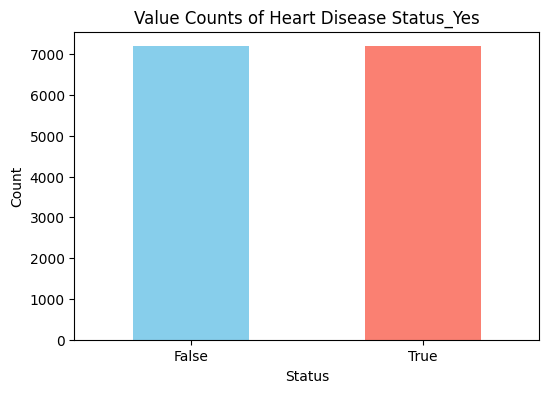

In [48]:
import matplotlib.pyplot as plt

# Replace 'd1' with the correct DataFrame if needed
# Plot value counts for 'Heart Disease Status_Yes'
value_counts = YT.value_counts()
plt.figure(figsize=(6,4))
value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Value Counts of Heart Disease Status_Yes')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()